[*********************100%%**********************]  1 of 1 completed

Epoch 1/10



C:\Users\Lenovo\.ms-ad\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0136
Epoch 2/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 3.5725e-04
Epoch 3/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 3.3249e-04
Epoch 4/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 3.2703e-04
Epoch 5/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 2.7217e-04
Epoch 6/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 3.4658e-04
Epoch 7/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 2.5035e-04
Epoch 8/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 2.2089e-04
Epoch 9/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 2.1762e-04
Epoch 10/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 2.0434e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


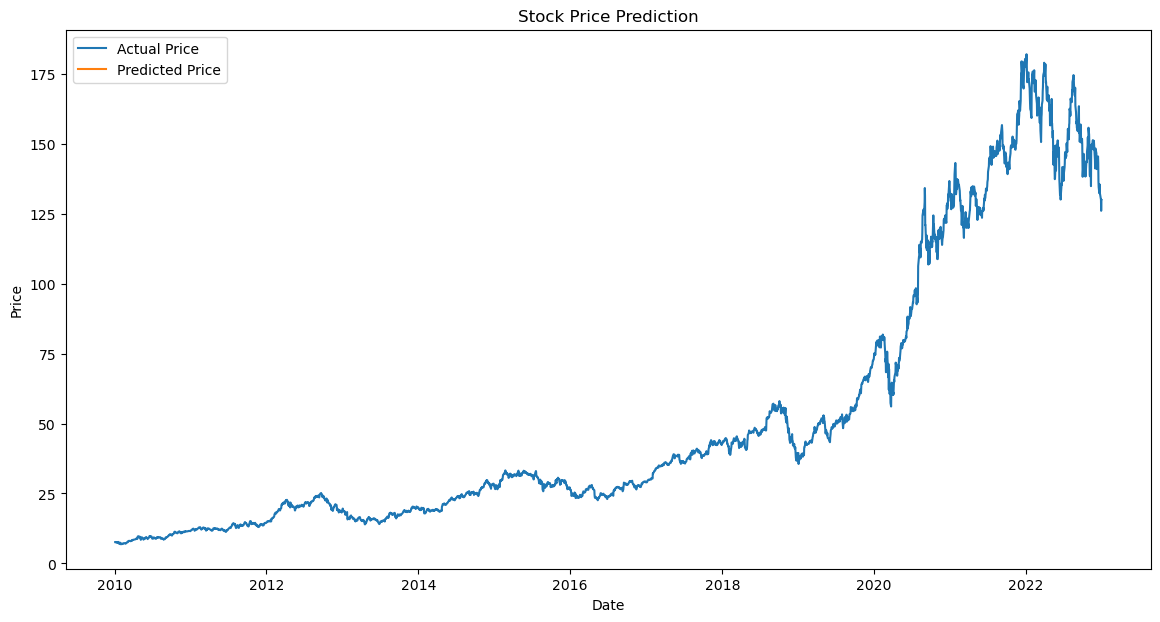

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import yfinance as yf

# Fetch historical stock price data
stock_data = yf.download('AAPL', start='2010-01-01', end='2023-01-01')

# Use only the 'Close' prices
data = stock_data[['Close']].dropna()

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Prepare the dataset for the LSTM model
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape for LSTM

# Define and compile the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=10, batch_size=32)

# Prepare test data and make predictions
inputs = scaled_data[-time_step:]
inputs = inputs.reshape((1, time_step, 1))
predicted_price = model.predict(inputs)
predicted_price = scaler.inverse_transform(predicted_price)

# Plot the actual vs. predicted prices
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Actual Price')
plt.plot(data.index[-len(predicted_price):], predicted_price, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()